In [7]:
import os
for dirname, _, filenames in os.walk('churn.csv'):
    for filename in filenames:
        print(os.path.join(dirname, churn.csv))

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*Do not pass an `input_shape`.*")  # Suppress the specific warning

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)  # Set to WARNING or ERROR
from contextlib import redirect_stdout


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_auc_score, make_scorer
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn import set_config
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pprint import pprint
sns.set(style = 'white')


warnings.filterwarnings('ignore')

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None

In [8]:
df = pd.read_csv('churn.csv')
print(f'Number of rows and columns: {df.shape}')

df.head(10)

Number of rows and columns: (7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#drop customerID
df = df.iloc[:,1:]
# Convert 'TotalCharges' to numeric, handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


# Convert all categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                            True              False  ...            False   
1                           False              False  ...            False   
2                           False              False  ...            False   
3                            True              False  ...            False   
4                           False              False  ...            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  Churn_Yes  
0                       False      False  
1                        True      False  
2                        True       True  
3                       False      False  
4                       False       True  

[5 rows x 31 columns]

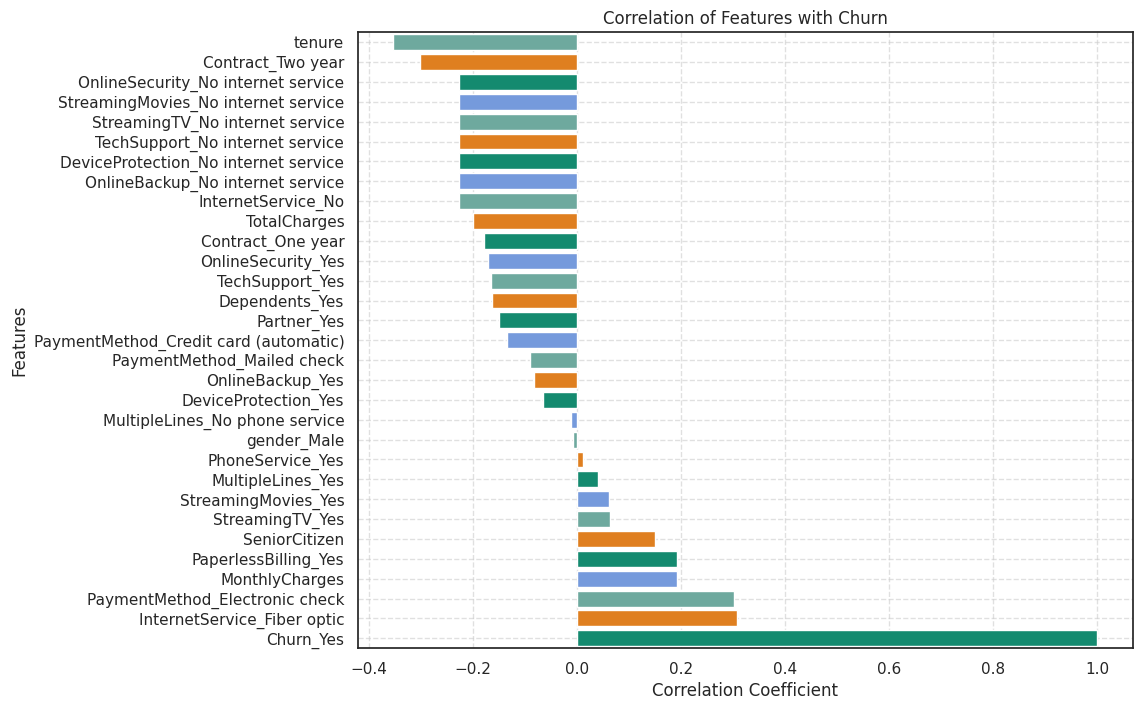

In [12]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values with respect to 'Churn_Yes' column
churn_corr = corr_matrix['Churn_Yes'].sort_values()

color_palette = ['#64B3A4', '#FF7F00', '#009E79', '#6495ED']

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette=color_palette)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [13]:
# define NO of plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

In [14]:
# Nomber of plot
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 24))
fig.subplots_adjust(hspace=0.5)

# Gender distribution by Churn
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Gender by Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', labels=['No', 'Yes'])

# Senior Citizen distribution by Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribution of Senior Citizens by Churn')
axes[1].set_xlabel('Senior Citizen Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Partner distribution by Churn
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Distribution of Partner Status by Churn')
axes[2].set_xlabel('Partner Status')
axes[2].set_ylabel('Count')
axes[2].legend(title='Churn', labels=['No', 'Yes'])

# Dependents distribution by Churn
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[3], palette='Set2')
axes[3].set_title('Distribution of Dependents by Churn')
axes[3].set_xlabel('Dependents Status')
axes[3].set_ylabel('Count')
axes[3].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


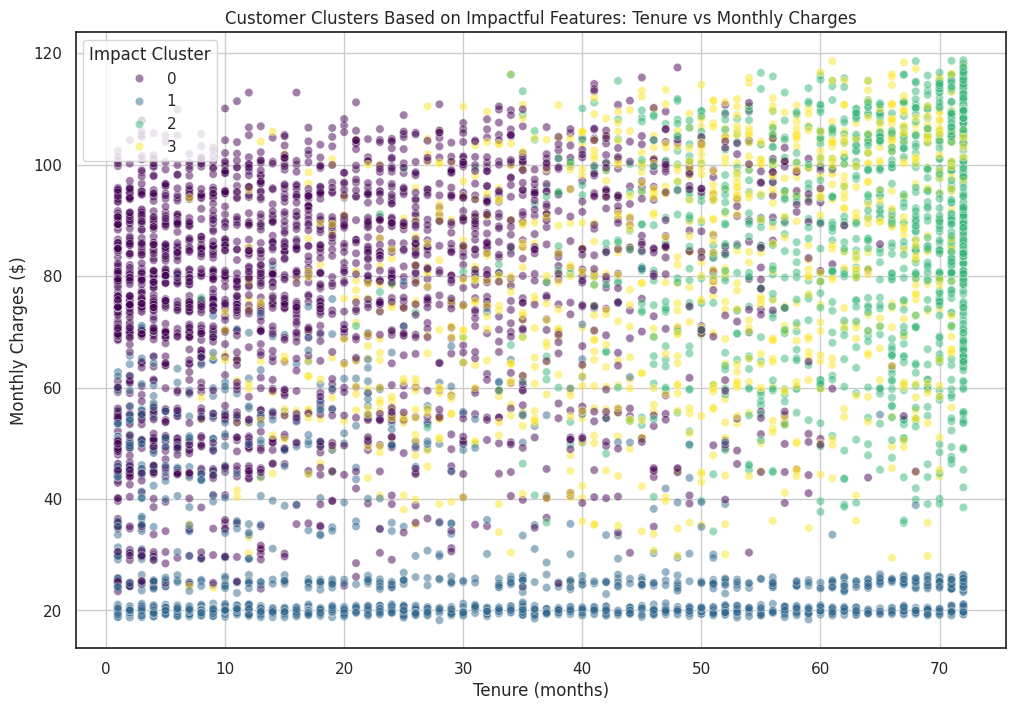

In [15]:
# One-hot encoding the categorical columns
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']
data_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Including the numerical columns
impactful_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']].join(data_encoded)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(impactful_features)

# Applying K-means clustering
kmeans_impact = KMeans(n_clusters=4, random_state=42)
clusters_impact = kmeans_impact.fit_predict(features_scaled)

# Adding the cluster labels to the original data
df['Impact_Cluster'] = clusters_impact

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Impact_Cluster', palette='viridis', data=df, alpha=0.5)
plt.title('Customer Clusters Based on Impactful Features: Tenure vs Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Impact Cluster')
plt.grid(True)
plt.show()

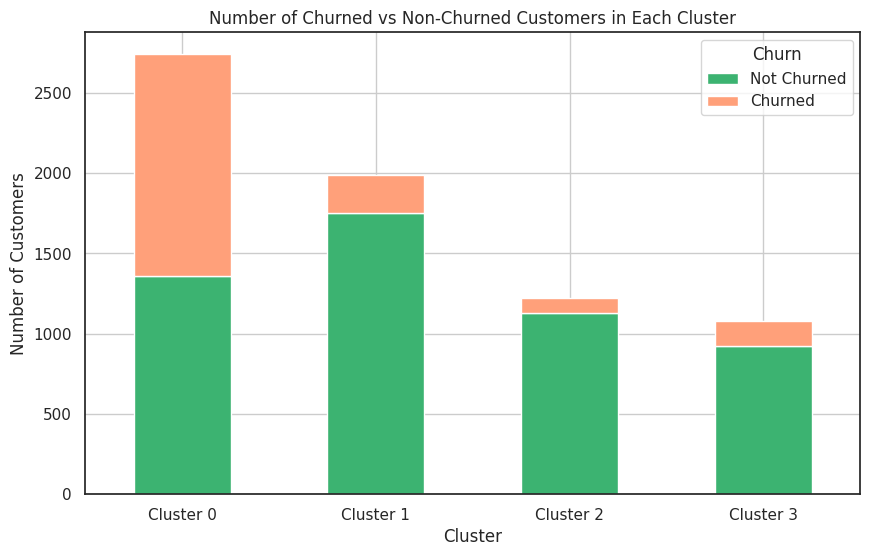

Churn             No   Yes
Impact_Cluster            
0               1357  1384
1               1754   237
2               1129    94
3                923   154

In [16]:
# Counting churned and non-churned customers in each cluster
churn_counts = df.groupby(['Impact_Cluster', 'Churn']).size().unstack(fill_value=0)

# Plotting the churn counts
churn_counts.plot(kind='bar', stacked=True, color=['mediumseagreen', 'lightsalmon'], figsize=(10, 6))
plt.title('Number of Churned vs Non-Churned Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], rotation=0)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.grid(True)
plt.show()

churn_counts

In [17]:
categorical = df.select_dtypes("object")
encoder = OrdinalEncoder().fit(categorical)
encoded = encoder.transform(categorical)
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [18]:
number = df.select_dtypes("number").reset_index(drop=True)
cate = pd.DataFrame(encoded.astype("int64"),columns=categorical.columns).reset_index(drop=True)
df = pd.concat([number,cate],axis=1)
df.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Impact_Cluster  \
0              0       1           29.85         29.85               0   
1              0      34           56.95       1889.50               3   
2              0       2           53.85        108.15               1   
3              0      45           42.30       1840.75               3   
4              0       2           70.70        151.65               0   

   gender  Partner  Dependents  PhoneService  MultipleLines  ...  \
0       0        1           0             0              1  ...   
1       1        0           0             1              0  ...   
2       1        0           0             1              0  ...   
3       1        0           0             0              1  ...   
4       0        0           0             1              0  ...   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  
0                0         0                 1              2      0  
1                0         1                 0              3      0  
2                0         0                 1              3      1  
3                0         1                 0              0      0  
4                0         0                 1              2      1  

[5 rows x 21 columns]

In [19]:
# Split the dataset
X = df.iloc[:,:-1]
Y = df.iloc[:,-1].values

# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  XGBoost classifier
xgb = XGBClassifier(verbosity=0)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}



# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_xgb.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8340380648746618


In [22]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for LSTM Model:", roc_auc)

ROC-AUC Score for LSTM Model: 0.8340380648746618
